In [1]:
import pandas as pd
import numpy as np
import urllib.request
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset4500.csv')

In [3]:
df.head()

,artist,name,url,yt_links,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,Mariah Carey,All I Want for Christmas Is You,https://www.last.fm/music/Mariah+Carey/_/All+I...,https://www.youtube.com/watch?v=yXQViqx6GMY,christmas,pop,xmas,mariah carey,pop,rnb,female vocalists,NaN
1,Olivia Rodrigo,good 4 u,https://www.last.fm/music/Olivia+Rodrigo/_/goo...,https://www.youtube.com/watch?v=gNi_6U5Pm_o,pop rock,rock,pop punk,sour,pop,pop rock,indie pop,NaN
2,Doja Cat,Kiss Me More (feat. SZA),https://www.last.fm/music/Doja+Cat/_/Kiss+Me+M...,https://www.youtube.com/watch?v=0EVVKs6DQLo,planet her,pop,rnb,pop rap,2021,pop,rnb,rap
3,Wham!,Last Christmas,https://www.last.fm/music/Wham%21/_/Last+Chris...,https://www.youtube.com/watch?v=E8gmARGvPlI,christmas,80s,pop,xmas,pop,80s,british,NaN
4,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),https://www.last.fm/music/Lil+Nas+X/_/INDUSTRY...,https://www.youtube.com/watch?v=UTHLKHL_whs,rap,hip-hop,trap,pop rap,2021,hip-hop,rap,country rap


Чистка датасета от песен, где теги не были указаны

In [4]:
df_w_genres = df[~df[df.columns[-8:]].isna().all(axis=1)]

-39 песен

In [5]:
missing_yt = df_w_genres[df_w_genres.yt_links == "None"]
missing_yt.head()

,artist,name,url,yt_links,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
874,Offset,Ric Flair Drip (with Metro Boomin),https://www.last.fm/music/Offset/_/Ric+Flair+D...,None,travis scott,trap,hip-hop,rap,travis scott,trap,hip-hop,NaN
1090,Death Grips,Get Got,https://www.last.fm/music/Death+Grips/_/Get+Got,None,hip-hop,experimental hip-hop,rap,experimental,hip-hop,experimental,experimental hip-hop,NaN
1413,BTS,Epiphany,https://www.last.fm/music/BTS/_/Epiphany,None,pop,rnb,usa,pop,rnb,usa,NaN,NaN
1431,I DONT KNOW HOW BUT THEY FOUND ME,choke,https://www.last.fm/music/I+DONT+KNOW+HOW+BUT+...,None,hip-hop,experimental,noided,experimental hip-hop,industrial hip-hop,hip-hop,experimental,experimental hip-hop
1555,Frank Sinatra,Have Yourself A Merry Little Christmas - Remas...,https://www.last.fm/music/Frank+Sinatra/_/Have...,None,jazz,swing,oldies,vocal jazz,jazz,swing,christmas,NaN


# Пробую восстановить утерянные ссылки

In [6]:
search_query = "https://www.youtube.com/results?search_query="
yt_vid_link = "https://www.youtube.com/watch?v="
def get_yt_link(artist, name):
    link = search_query + artist + ' ' + name
    link = link.encode('ascii', 'ignore').decode('ascii')
    html = urllib.request.urlopen(link.replace(' ', '+'))
    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
    return yt_vid_link + video_ids[0]

In [7]:
result_links = [get_yt_link(artist, name) for artist, name in zip(missing_yt['artist'], missing_yt['name'])]

In [8]:
df_w_genres.yt_links[df_w_genres.yt_links == "None"] = result_links

C:\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [9]:
df_w_genres.iloc[871]

artist                                                 Offset
name                       Ric Flair Drip (with Metro Boomin)
url         https://www.last.fm/music/Offset/_/Ric+Flair+D...
yt_links          https://www.youtube.com/watch?v=LPTlvQ1Zet0
Genre0                                           travis scott
Genre1                                                   trap
Genre2                                                hip-hop
Genre3                                                    rap
Genre4                                           travis scott
Genre5                                                   trap
Genre6                                                hip-hop
Genre7                                                    NaN
Name: 874, dtype: object

Worked flawless! :)

# Наиболее часто встречаемые жанры

In [10]:
df_cleaned = df_w_genres.reset_index()

In [11]:
df_genres = df_cleaned[df_cleaned.columns[-8:]]

In [12]:
df_genres

,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,christmas,pop,xmas,mariah carey,pop,rnb,female vocalists,NaN
1,pop rock,rock,pop punk,sour,pop,pop rock,indie pop,NaN
2,planet her,pop,rnb,pop rap,2021,pop,rnb,rap
3,christmas,80s,pop,xmas,pop,80s,british,NaN
4,rap,hip-hop,trap,pop rap,2021,hip-hop,rap,country rap
...,...,...,...,...,...,...,...,...
4456,rap,salsa,baby keem,latin trap,rap,hip-hop,trap,NaN
4457,80s,pop,rock,scottish,happy,scottish,rock,pop
4458,rnb,sexy,ballad,soul,pop,pop,rnb,male vocalists
4459,hip hop,rap,kanye west,hip-hop,hip-hop,rap,hip hop,NaN


In [13]:
genres_arr = df_genres.values
print(genres_arr)
genres_arr1d = genres_arr.flatten()

[['christmas' 'pop' 'xmas' ... 'rnb' 'female vocalists' nan]
 ['pop rock' 'rock' 'pop punk' ... 'pop rock' 'indie pop' nan]
 ['planet her' 'pop' 'rnb' ... 'pop' 'rnb' 'rap']
 ...
 ['rnb' 'sexy' 'ballad' ... 'pop' 'rnb' 'male vocalists']
 ['hip hop' 'rap' 'kanye west' ... 'rap' 'hip hop' nan]
 ['experimental hip hop' 'rap' 'glitch hop' ... 'experimental'
  'glitch hop' nan]]


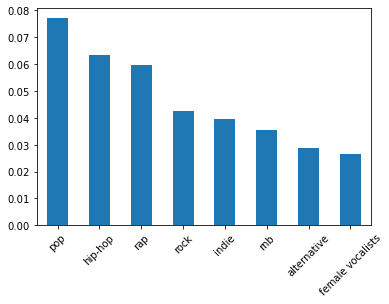

In [14]:
def plot_probs(arr, number_bins = 3):
    prob = pd.value_counts(arr, normalize=True)
    prob.sort_values(ascending=False)
    prob_num = prob[:number_bins]
    #mask = prob > threshold
    #tail_prob = prob[~mask].sum()
    #prob = prob[mask]
    #prob['other'] = tail_prob
    prob_num.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.show()
    return prob

_ = plot_probs(genres_arr1d, number_bins=8)

maybe split genres into words

In [15]:
genrs = list()
for song in genres_arr:
    a = list()
    for genre in song:
        if genre == genre:
            if genre != 'hip hop':
                a.extend(genre.split(' '))
    genrs.append(np.array(a, dtype=object))
genrs = np.array(genrs, dtype=object)

In [16]:
df_splitted = pd.DataFrame(genrs.tolist())
df_splitted.rename(columns={key:f'Genre{key}' for key in range(31)}, inplace=True)
df_splitted

,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,...,Genre21,Genre22,Genre23,Genre24,Genre25,Genre26,Genre27,Genre28,Genre29,Genre30
0,christmas,pop,xmas,mariah,carey,pop,rnb,female,vocalists,None,...,None,None,None,None,None,None,None,None,None,None
1,pop,rock,rock,pop,punk,sour,pop,pop,rock,indie,...,None,None,None,None,None,None,None,None,None,None
2,planet,her,pop,rnb,pop,rap,2021,pop,rnb,rap,...,None,None,None,None,None,None,None,None,None,None
3,christmas,80s,pop,xmas,pop,80s,british,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,rap,hip-hop,trap,pop,rap,2021,hip-hop,rap,country,rap,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,rap,salsa,baby,keem,latin,trap,rap,hip-hop,trap,None,...,None,None,None,None,None,None,None,None,None,None
4457,80s,pop,rock,scottish,happy,scottish,rock,pop,None,None,...,None,None,None,None,None,None,None,None,None,None
4458,rnb,sexy,ballad,soul,pop,pop,rnb,male,vocalists,None,...,None,None,None,None,None,None,None,None,None,None
4459,rap,kanye,west,hip-hop,hip-hop,rap,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


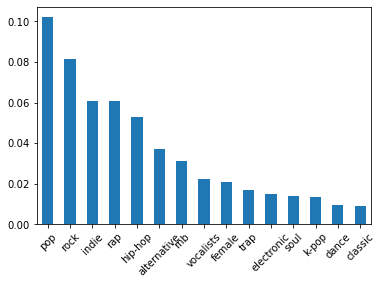

pop            0.102014
rock           0.081693
indie          0.060712
rap            0.060687
hip-hop        0.053060
                 ...   
sharp          0.000025
nightcore      0.000025
lute           0.000025
sleepwalker    0.000025
perreo         0.000025
Length: 2107, dtype: float64

In [17]:
prob_df = plot_probs(df_splitted.values.flatten(), number_bins=15)
prob_df

In [18]:
probs = pd.value_counts(df_splitted.values.flatten(), normalize=True)
def sort(x):
    def get_prob(key):
        global probs
        if key != None and all(key != match for match in ['and', '2020', 'this', 'is']):
            return probs[key]
        else:
            return 0
    return sorted(x, key=get_prob, reverse=True)

n_df = df_splitted.copy()
n_df[df_splitted.columns.to_list()] = np.apply_along_axis(sort, axis=1, arr=df_splitted.values)

In [19]:
cleaned_df = df_w_genres.copy()
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.update(n_df['Genre0'])
cleaned_df.drop(cleaned_df.columns[-7:],inplace=True, axis=1)
cleaned_df.rename(columns={'Genre0':'Genre'}, inplace=True)
cleaned_df

,artist,name,url,yt_links,Genre
0,Mariah Carey,All I Want for Christmas Is You,https://www.last.fm/music/Mariah+Carey/_/All+I...,https://www.youtube.com/watch?v=yXQViqx6GMY,pop
1,Olivia Rodrigo,good 4 u,https://www.last.fm/music/Olivia+Rodrigo/_/goo...,https://www.youtube.com/watch?v=gNi_6U5Pm_o,pop
2,Doja Cat,Kiss Me More (feat. SZA),https://www.last.fm/music/Doja+Cat/_/Kiss+Me+M...,https://www.youtube.com/watch?v=0EVVKs6DQLo,pop
3,Wham!,Last Christmas,https://www.last.fm/music/Wham%21/_/Last+Chris...,https://www.youtube.com/watch?v=E8gmARGvPlI,pop
4,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),https://www.last.fm/music/Lil+Nas+X/_/INDUSTRY...,https://www.youtube.com/watch?v=UTHLKHL_whs,pop
...,...,...,...,...,...
4456,Baby Keem,booman,https://www.last.fm/music/Baby+Keem/_/booman,https://www.youtube.com/watch?v=Q3oIiiCFCSw,rap
4457,The Proclaimers,I'm Gonna Be (500 Miles),https://www.last.fm/music/The+Proclaimers/_/I%...,https://www.youtube.com/watch?v=tbNlMtqrYS0,pop
4458,Bruno Mars,Versace on the Floor,https://www.last.fm/music/Bruno+Mars/_/Versace...,https://www.youtube.com/watch?v=-FyjEnoIgTM,pop
4459,Kanye West,Never Let Me Down,https://www.last.fm/music/Kanye+West/_/Never+L...,https://www.youtube.com/watch?v=p4NvOKy7GOU,rap


In [20]:
cleaned_df.to_csv('cleaned_4500.csv', index=False)